In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [28]:
df = pd.read_csv('Iris.csv')

In [29]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
df = df.iloc[:,1:]

In [31]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
encoder = LabelEncoder()

In [34]:
df['Species'] = encoder.fit_transform(df['Species'])

In [35]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [37]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

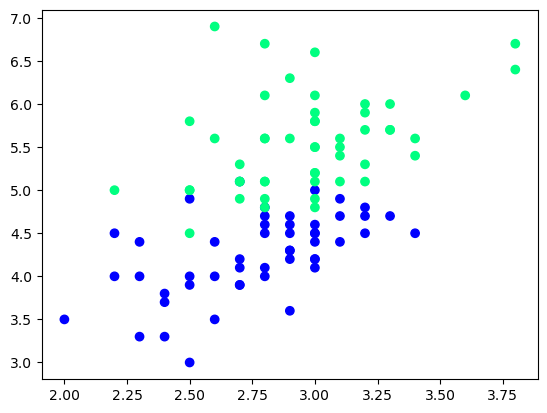

In [39]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [40]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
75,3.0,4.4,1
60,2.0,3.5,1
107,2.9,6.3,2
52,3.1,4.9,1
57,2.4,3.3,1
61,3.0,4.2,1
79,2.6,3.5,1
94,2.7,4.2,1
98,2.5,3.0,1
101,2.7,5.1,2


In [41]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [42]:
df_train

,SepalWidthCm,PetalLengthCm,Species
73,2.8,4.7,1
90,2.6,4.4,1
114,2.8,5.1,2
72,2.5,4.9,1
104,3.0,5.8,2
147,3.0,5.2,2
85,3.4,4.5,1
71,2.8,4.0,1
54,2.8,4.6,1
142,2.7,5.1,2


In [43]:
df_val

,SepalWidthCm,PetalLengthCm,Species
138,3.0,4.8,2
130,2.8,6.1,2
123,2.7,4.9,2
128,2.8,5.6,2
135,3.0,6.1,2


In [44]:
df_test

,SepalWidthCm,PetalLengthCm,Species
95,3.0,4.2,1
136,3.4,5.6,2
132,2.8,5.6,2
53,2.3,4.0,1
52,3.1,4.9,1


In [45]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [46]:
y_test

array([2, 2, 2, 2, 2])

# Case 1 - Bagging

In [47]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
114,2.8,5.1,2
142,2.7,5.1,2
90,2.6,4.4,1
54,2.8,4.6,1
147,3.0,5.2,2
90,2.6,4.4,1
72,2.5,4.9,1
73,2.8,4.7,1


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [49]:
dt_bag1 = DecisionTreeClassifier()

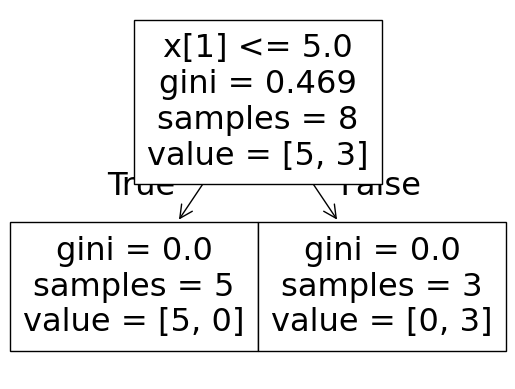

d:\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


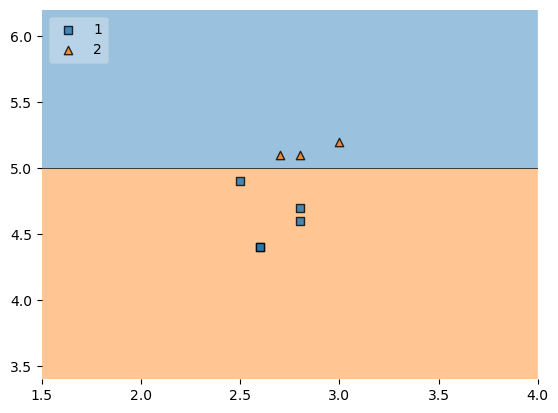

In [50]:
evaluate(dt_bag1,X,y)

In [51]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
72,2.5,4.9,1
72,2.5,4.9,1
104,3.0,5.8,2
142,2.7,5.1,2
73,2.8,4.7,1
147,3.0,5.2,2
147,3.0,5.2,2
142,2.7,5.1,2


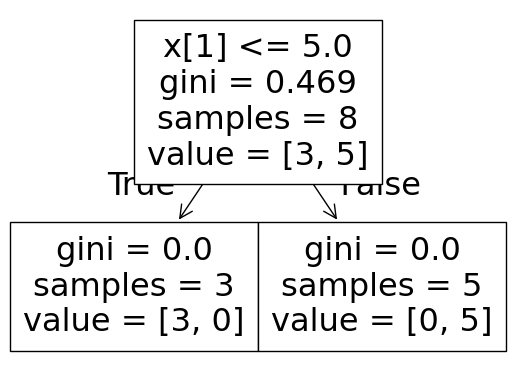

d:\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


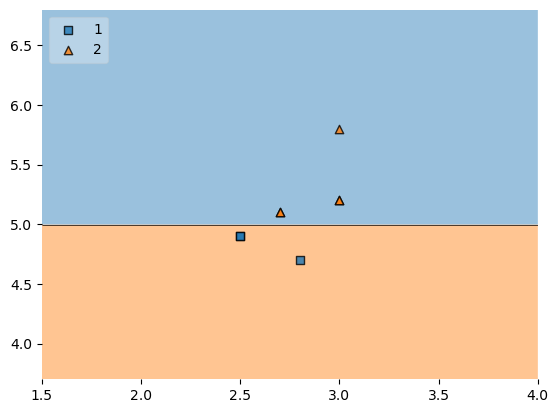

In [52]:
def evaluate(clf,X,y):
	clf.fit(X,y)
	plot_tree(clf)
	plt.show()
	plot_decision_regions(X.values, y.values, clf=clf, legend=2)
	y_pred = clf.predict(X_test)
	print(accuracy_score(y_test,y_pred))

dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [53]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
73,2.8,4.7,1
147,3.0,5.2,2
90,2.6,4.4,1
71,2.8,4.0,1
142,2.7,5.1,2
85,3.4,4.5,1
142,2.7,5.1,2
147,3.0,5.2,2


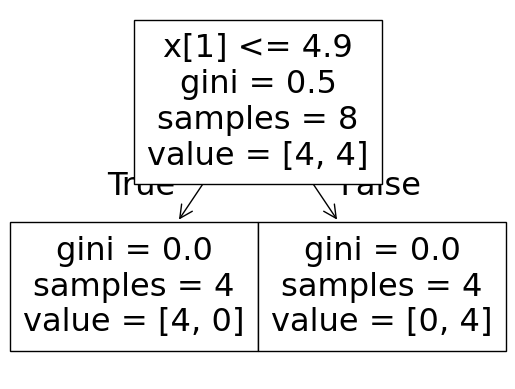

d:\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


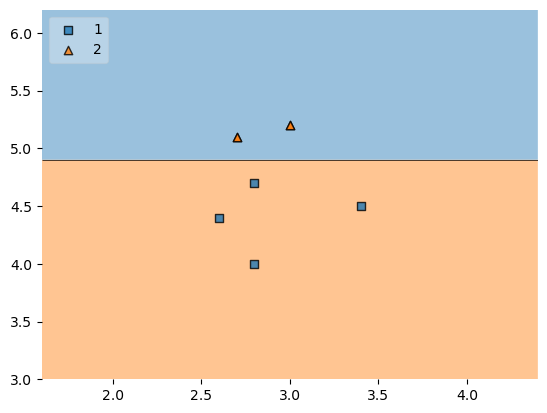

In [54]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [55]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

## Predict

In [56]:
df_test

,SepalWidthCm,PetalLengthCm,Species
95,3.0,4.2,1
136,3.4,5.6,2
132,2.8,5.6,2
53,2.3,4.0,1
52,3.1,4.9,1


In [57]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [2]


d:\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [58]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
73,2.8,4.7,1
90,2.6,4.4,1
114,2.8,5.1,2
72,2.5,4.9,1
104,3.0,5.8,2
147,3.0,5.2,2
85,3.4,4.5,1
71,2.8,4.0,1
54,2.8,4.6,1
142,2.7,5.1,2


In [59]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
90,2.6,4.4,1
85,3.4,4.5,1
73,2.8,4.7,1
114,2.8,5.1,2
54,2.8,4.6,1
147,3.0,5.2,2
71,2.8,4.0,1
104,3.0,5.8,2


# Random Subspaces

In [61]:
df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)

In [62]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
61,62,5.9,3.0,4.2,1.5,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
40,41,5.0,3.5,1.3,0.3,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
108,109,6.7,2.5,5.8,1.8,Iris-virginica
127,128,6.1,3.0,4.9,1.8,Iris-virginica
138,139,6.0,3.0,4.8,1.8,Iris-virginica
16,17,5.4,3.9,1.3,0.4,Iris-setosa
122,123,7.7,2.8,6.7,2.0,Iris-virginica


In [63]:
df1.sample(2,replace=True,axis=1)

,SepalWidthCm,Species
84,3.0,Iris-versicolor
61,3.0,Iris-versicolor
96,2.9,Iris-versicolor
40,3.5,Iris-setosa
8,2.9,Iris-setosa
108,2.5,Iris-virginica
127,3.0,Iris-virginica
138,3.0,Iris-virginica
16,3.9,Iris-setosa
122,2.8,Iris-virginica


# Random Patches

In [64]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
61,62,5.9,3.0,4.2,1.5,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
40,41,5.0,3.5,1.3,0.3,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
108,109,6.7,2.5,5.8,1.8,Iris-virginica
127,128,6.1,3.0,4.9,1.8,Iris-virginica
138,139,6.0,3.0,4.8,1.8,Iris-virginica
16,17,5.4,3.9,1.3,0.4,Iris-setosa
122,123,7.7,2.8,6.7,2.0,Iris-virginica


In [65]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,Species,SepalLengthCm
108,Iris-virginica,6.7
8,Iris-setosa,4.4
8,Iris-setosa,4.4
96,Iris-versicolor,5.7
138,Iris-virginica,6.0
108,Iris-virginica,6.7
84,Iris-versicolor,5.4
61,Iris-versicolor,5.9
